In [1]:
### Library Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [9]:
### Function to Import Rate Data
def import_fx_data(tickers, start_date):
    data = pd.DataFrame()
    if isinstance(tickers, str):
        tickers = [tickers]
        
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start = start_date)['Adj Close']
        
    # Reset index to make headings in the same row
    data.reset_index(inplace = True)
    # Convert values in date col to dt
    data['Date'] = pd.to_datetime(data['Date'])

    return data

### Call Function to Load in Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
forex_pairs = ['GBPJPY=X', 'GBPCHF=X']
start_date = '2021-01-01'
forex_data = import_fx_data(all_forex_pairs, start_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,EURUSD=X,GBPUSD=X,USDJPY=X,USDCHF=X,AUDUSD=X,NZDUSD=X,USDCAD=X,EURGBP=X,EURJPY=X,...,GBPJPY=X,GBPCHF=X,AUDJPY=X,AUDCHF=X,AUDNZD=X,NZDJPY=X,NZDCHF=X,CADJPY=X,CADCHF=X,CHFJPY=X
897,2024-06-11,1.076426,1.272637,157.039993,0.89658,0.660895,0.612831,1.37612,0.84574,169.020004,...,199.843994,1.14096,103.751060,0.591900,1.078220,96.223000,0.54935,114.080002,0.65147,175.119995
898,2024-06-12,1.074033,1.274048,157.104996,0.89778,0.660770,0.614602,1.37549,0.84290,168.720993,...,200.143005,1.14372,103.805000,0.593226,1.075130,96.542999,0.55166,114.214996,0.65264,174.970001
899,2024-06-13,1.081315,1.279623,156.800003,0.89426,0.666290,0.618682,1.37219,0.84500,169.520004,...,200.630997,1.14400,104.468002,0.595810,1.076930,96.992996,0.55316,114.273003,0.65166,175.321335
900,2024-06-14,1.073883,1.275510,157.322998,0.89393,0.663310,0.616101,1.37410,0.84182,168.725998,...,200.419998,1.14024,104.214996,0.592500,1.076576,96.791000,0.55065,114.331001,0.65041,175.755432
901,2024-06-16,1.070778,1.268633,NaN,0.88940,0.661770,0.614439,1.37340,0.84384,168.453003,...,199.619003,1.12849,104.095001,0.588100,1.076500,96.652000,0.54310,114.542000,0.64719,176.813995


In [10]:
### Plot FX Rate Data
def plot_forex(df, forex_pairs):
    # Create Loop to Plot Each Individual FX Pair
    for pair in forex_pairs:
        plt.figure(figsize = (6, 4))

        plt.plot(df['Date'], df[pair]) # Need to adjust to spit out multiple graphs for each ticker
        plt.title(pair + ' Closing Rates Over Time')
        plt.xlabel('Date')
        plt.ylabel('FX Rates')

        plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
        plt.grid(True)
        plt.tight_layout()

    return plt.show()

#plot_forex(forex_data, forex_pairs)

In [4]:
### Compute Direct Hedge Daily Returns
def direct_daily_rets(fx_data):
    # Ensure 'Date' is set as the index for proper computation
    fx_data.set_index('Date', inplace=True)
    
    # Compute the daily returns of the forex data
    rets = fx_data.pct_change().dropna()
    
    # Reset index to make date a column again
    rets.reset_index(inplace=True)

    return rets

### Call Function to Calculate Daily Returns
daily_returns = direct_daily_rets(forex_data)
print(daily_returns.head())


        Date  GBPJPY=X  GBPCHF=X
0 2021-01-04  0.000829 -0.014968
1 2021-01-05 -0.009373 -0.010321
2 2021-01-06 -0.000029  0.000811
3 2021-01-07  0.002937 -0.000460
4 2021-01-08  0.003406  0.003963


In [5]:
### Compute Hedge Ratio
def compute_hedge_ratio(pairs, returns):
    # Run linear regression to compute the hedge ratio
    rets1 = returns[pairs[0]]
    rets2 = returns[pairs[1]]
    # Add a constant to the independent variable
    rets1 = sm.add_constant(rets1)
    # Fit the regression model
    model = sm.OLS(rets2, rets1).fit()
    # Extract the hedge ratio
    hedge_ratio = model.params[pairs[0]]

    return hedge_ratio

### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(forex_pairs, daily_returns)
print("Hedge Ratio:", hedge_ratio)

Hedge Ratio: 0.41097912748853815


In [6]:
### Define and Calculate Hedged and Unhedged Returns
def calculate_hedged_unhedged(long_pos, pairs, returns, hedge_ratio):
    # Compute Short Position
    short_pos = -hedge_ratio * long_pos

    # Compute daily returns for the long and short positions
    long_rets = returns[pairs[0]]
    short_rets = -hedge_ratio * returns[pairs[1]]

    # Compute the returns of the hedged and unhedged positions
    hedged_rets = long_rets + short_rets
    unhedged_rets = long_rets

    # Compute cumulative returns for the hedged and unhedged positions
    hedged_cumulative_rets = (1 + hedged_rets).cumprod() * long_pos
    unhedged_cumulative_rets = (1 + unhedged_rets).cumprod() * long_pos

    return short_pos, hedged_cumulative_rets, unhedged_cumulative_rets
    

### Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, forex_pairs, daily_returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))

Long Position Size:  1000
Short Position Size:  -410.9791
Recent Hedged Cumulative Returns:  895    1457.155991
896    1458.570112
897    1459.302372
898    1462.713624
899    1457.311461
dtype: float64
Recent Unhedged Cumulative Returns:  895    1414.269530
896    1415.927413
897    1418.045956
898    1421.503455
899    1414.333316
Name: GBPJPY=X, dtype: float64


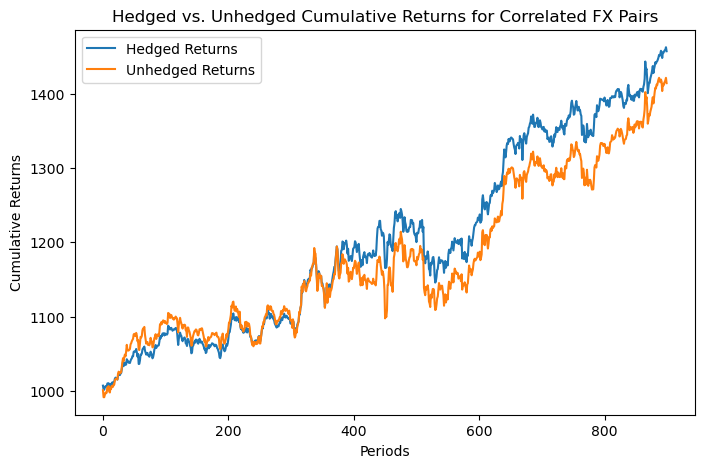

In [7]:
### Plot Hedged vs. Unhedged Returns
def plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets):
    plt.figure(figsize = (8, 5))
    plt.plot(hedged_cumulative_rets.index, hedged_cumulative_rets, label = 'Hedged Returns')
    plt.plot(unhedged_cumulative_rets.index, unhedged_cumulative_rets, label = 'Unhedged Returns')
    plt.xlabel('Periods')
    plt.ylabel('Cumulative Returns')
    plt.title('Hedged vs. Unhedged Cumulative Returns for Correlated FX Pairs')
    plt.legend()

    return plt.show()

### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)

In [8]:
### Function to Compute Performance Metrics
def performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, returns):
    # Drop na values for proper analysis
    hedged_cumulative_rets.dropna()
    unhedged_cumulative_rets.dropna()

    # Compute Hedged/Unhedged Total Returns (Current - Start)
    hedged_total_rets = hedged_cumulative_rets.iloc[-1] - long_pos
    unhedged_total_rets = unhedged_cumulative_rets.iloc[-1] - long_pos

    # Compute Hedged/Unhedged Annualized Returns
    hedged_ann_rets = (1 + hedged_total_rets)**(252 / len(returns)) - 1
    unhedged_ann_rets = (1 + unhedged_total_rets)**(252 / len(returns)) - 1

    # Compute Hedged/Unhedged Mean Returns
    hedged_mean = np.mean(hedged_cumulative_rets)
    unhedged_mean = np.mean(unhedged_cumulative_rets)

    # Compute Hedged/Unhedged Mean Returns
    hedged_stddev = np.std(hedged_cumulative_rets)
    unhedged_stddev = np.std(unhedged_cumulative_rets)

    # Compute the Hedged/Unhedged Sharpe Ratio
    hedged_sharpe_ratio = hedged_mean / hedged_stddev * np.sqrt(252)
    unhedged_sharpe_ratio = unhedged_mean / unhedged_stddev * np.sqrt(252) 

    # Enhanced readability using formatted strings
    print(f"{'Metric':<30} {'Hedged':>15} {'Unhedged':>15}")
    print("="*60)
    print(f"{'Total Returns':<30} {hedged_total_rets:>15.4f} {unhedged_total_rets:>15.4f}")
    print(f"{'Annualized Returns':<30} {hedged_ann_rets:>15.4f} {unhedged_ann_rets:>15.4f}")
    print(f"{'Mean Return':<30} {hedged_mean:>15.4f} {unhedged_mean:>15.4f}")
    print(f"{'Standard Deviation':<30} {hedged_stddev:>15.4f} {unhedged_stddev:>15.4f}")
    print(f"{'Sharpe Ratio':<30} {hedged_sharpe_ratio:>15.4f} {unhedged_sharpe_ratio:>15.4f}")

    # Explanation of Sharpe Ratio in print statements
    print(f"\nThe Sharpe ratio measures the risk-adjusted return of an investment.")
    print(f"In this instance, the hedged strategy has a Sharpe ratio of {hedged_sharpe_ratio:.4f},")
    print(f"which means for every unit of risk, the hedged portfolio is generating {hedged_sharpe_ratio:.4f} units of return above the risk-free rate.")
    print(f"The unhedged strategy has a Sharpe ratio of {unhedged_sharpe_ratio:.4f},")
    print(f"indicating that for every unit of risk, the unhedged portfolio is generating {unhedged_sharpe_ratio:.4f} units of return above the risk-free rate.")
    print(f"A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.")

### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_returns)

Metric                                  Hedged        Unhedged
Total Returns                         457.3115        414.3333
Annualized Returns                      4.5606          4.4094
Mean Return                          1202.3618       1179.1926
Standard Deviation                    127.9047        104.8799
Sharpe Ratio                          149.2275        178.4814

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 149.2275,
which means for every unit of risk, the hedged portfolio is generating 149.2275 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 178.4814,
indicating that for every unit of risk, the unhedged portfolio is generating 178.4814 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
